In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fname1 = "electron_30deg_50wob_NOISE120.mscw.fits"
with fits.open(fname1) as hdul:
   df1 = Table.read(hdul[1]).to_pandas()

fname2 = "protons_30deg_5.0wob_NOISE120.mscw.fits"
with fits.open(fname2) as hdul:
   df2 = Table.read(hdul[1]).to_pandas()

In [3]:
electron = df1.copy()
gamma = electron.iloc[:,:]  # electron and gamma shower identical after first interaction
proton = df2.copy()
hadron = proton.iloc[:,:]  # proton is hadron
#gamma.info()

In [4]:
gamma['class'] = 1  # postive class
hadron['class'] = 0  # negative class

In [5]:
gamma.shape

(466422, 60)

In [6]:
hadron = hadron.iloc[:466422,:]
hadron.shape

(466422, 60)

In [7]:
particles = pd.concat([gamma, hadron], ignore_index=True)

#particles = gamma.append(hadron)  # combining datasets
particles.shape

(932844, 60)

In [306]:
X = particles[['MSCW', 'MSCL', 'EChi2S', 'EmissionHeight', 
                  'EmissionHeightChi2', 'SizeSecondMax', 
                  'Core', 'dES']]
col = X
y = particles['class']

In [307]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [308]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
y_train[y_train == 1].shape, y_train[y_train == 0].shape

((279911,), (279795,))

In [310]:
import xgboost as xgb
import scipy.stats as sc
from sklearn.model_selection import KFold

from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [311]:
# xgb_clf = xgb.XGBClassifier(objective = 'binary:logistic')

In [312]:
# params = {'n_estimators': [100,200,400,500,800],
#               'learning_rate': [0.01, 0.03, 0.1, 0.3, 0.5],
#               'subsample': sc.uniform(0.3, 0.6),
#               'max_depth': [3, 4, 5, 6, 7, 8],
#               'colsample_bytree': sc.uniform(0.5, 0.4),
#               'min_child_weight': [1, 2, 3, 4]
#              }

In [313]:
# kfold_5 = KFold(5, shuffle = True, random_state = 42)

In [314]:
# bdt=RandomizedSearchCV(xgb_clf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=kfold_5,verbose=3,random_state=42)

In [315]:
# bdt.fit(X_train, y_train)

In [622]:
clf = xgb.XGBClassifier(n_estimators = 500, 
                        learning_rate=0.1, 
                        max_depth=6,
                        min_split_loss = 1,
                        min_child_weight = 3,
                        objective = 'binary:logistic',
                        colsample_bytree = 0.7,
                        subsample = 0.6,
                        random_state = 42)

In [623]:
clf.fit(X_train, y_train, 
        eval_set=[(X_test, y_test)],   # Validation set to monitor performance
        eval_metric='error',           # Evaluation metric to use
        early_stopping_rounds=5,       # Number of rounds without improvement before stopping
        verbose=True)

/home/marynaskew/VHEfun/VHEenv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/marynaskew/VHEfun/VHEenv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-error:0.20941
[1]	validation_0-error:0.15675
[2]	validation_0-error:0.14752
[3]	validation_0-error:0.14721
[4]	validation_0-error:0.14325
[5]	validation_0-error:0.14167
[6]	validation_0-error:0.14241
[7]	validation_0-error:0.14167
[8]	validation_0-error:0.14062
[9]	validation_0-error:0.13733
[10]	validation_0-error:0.13646
[11]	validation_0-error:0.13546
[12]	validation_0-error:0.13452
[13]	validation_0-error:0.13446
[14]	validation_0-error:0.13398
[15]	validation_0-error:0.13389
[16]	validation_0-error:0.13333
[17]	validation_0-error:0.13320
[18]	validation_0-error:0.13287
[19]	validation_0-error:0.13244
[20]	validation_0-error:0.13225
[21]	validation_0-error:0.13203
[22]	validation_0-error:0.13178
[23]	validation_0-error:0.13162
[24]	validation_0-error:0.13165
[25]	validation_0-error:0.13106
[26]	validation_0-error:0.13081
[27]	validation_0-error:0.13080
[28]	validation_0-error:0.13079
[29]	validation_0-error:0.13058
[30]	validation_0-error:0.13041
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, min_split_loss=1, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [624]:
# import pickle

In [625]:
# model_path = 'BDT_train.sav'

# with open(model_path, 'rb') as model_file:
#     model = pickle.load(model_file)

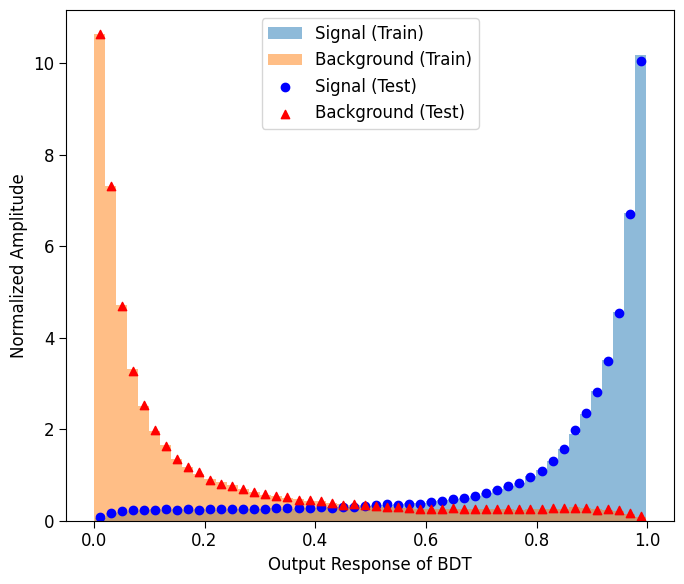

In [663]:
# Checking output responses for overfitting

train_signal_probs = clf.predict_proba(X_train)[:, 1]
test_signal_probs =clf.predict_proba(X_test)[:, 1]

plt.figure(figsize=(7, 6))

# Plot histograms for signal and background in training set
#plt.subplot(1, 2, 1)
plt.hist(train_signal_probs[y_train == 1], bins=50, alpha=0.5, label='Signal (Train)', density = True)
plt.hist(train_signal_probs[y_train == 0], bins=50, alpha=0.5, label='Background (Train)', density = True)

# plt.xlabel('Output Response of BDT')
# plt.ylabel('Normalized')
# plt.title('Training Set')
# plt.legend(loc = 'upper center')

countssig, edgessig = np.histogram(test_signal_probs[y_test == 1], bins=50, density = True)
bin_centerssig = 0.5*(edgessig[1:] + edgessig[:-1])

countsbkg, edgesbkg = np.histogram(test_signal_probs[y_test == 0], bins=50, density = True)
bin_centersbkg = 0.5*(edgessig[1:] + edgessig[:-1])

# Plot histograms for signal and background in testing set
#plt.subplot(1, 2, 2)
plt.scatter(bin_centerssig, countssig, marker = 'o', color = 'blue', label='Signal (Test)')
plt.scatter(bin_centersbkg, countsbkg, marker = '^', color = 'red', label='Background (Test)')
plt.xlabel('Output Response of BDT')
plt.ylabel('Normalized Amplitude')
#plt.title('Testing Set')
plt.legend(loc = 'upper center')

plt.tight_layout()
plt.savefig('output_BDT')
plt.show()

In [627]:
print(test_signal_probs)

[0.9640476  0.38810217 0.6801204  ... 0.95235264 0.96939486 0.70682824]


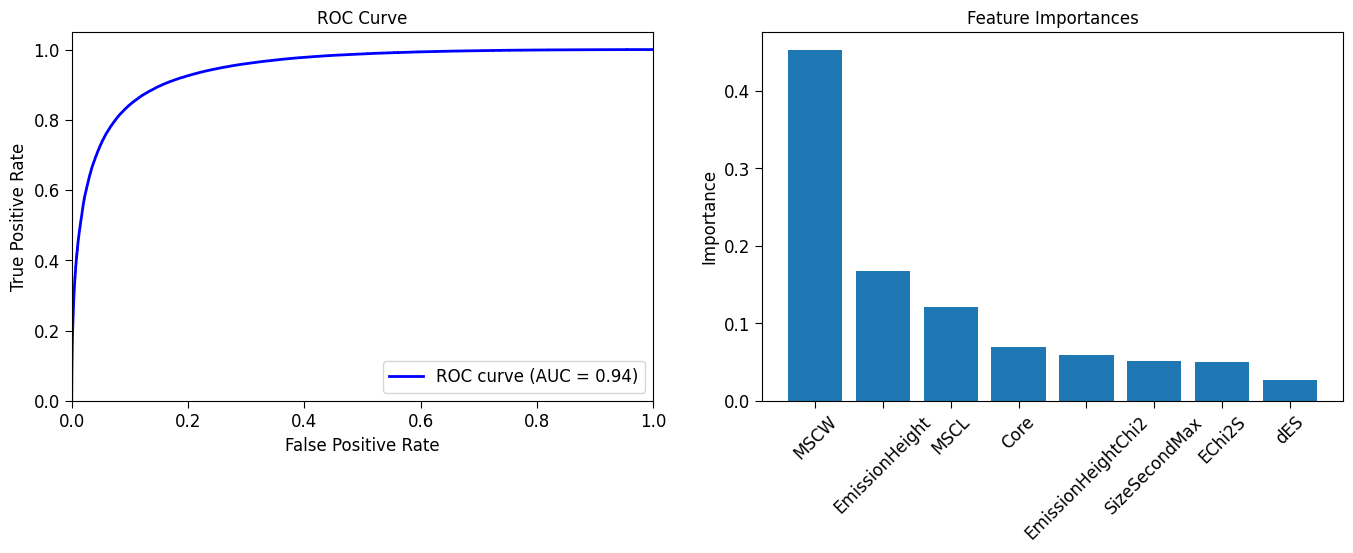

In [667]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_signal_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
#plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')


# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': col.columns,
    'Importance': feature_importances
})

# Sort the features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.subplot(1, 2, 2)
# Plot feature importances
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=45)
#plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout(pad = 2)
plt.savefig('BDT_ROC_imp')
plt.show()

In [629]:
y_pred = (test_signal_probs > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate accuracy score
accuracy = np.mean(y_pred == y_test)

print("Area under the ROC curve (AUC): {:.2f}".format(roc_auc))
print("XGBoostClassifier Model Accuracy:", accuracy_score(y_test, y_pred)*100)

Area under the ROC curve (AUC): 0.94
XGBoostClassifier Model Accuracy: 87.4319956691626


In [630]:
import pickle
filename = 'BDT_train.sav'
pickle.dump(clf, open(filename, 'wb'))

In [631]:
test_had = proton.iloc[441984:,:]

In [632]:
test_had_features = test_had[['MSCW', 'MSCL', 'EChi2S', 'EmissionHeight', 
                  'EmissionHeightChi2', 'SizeSecondMax', 
                  'Core', 'dES']]

In [633]:
test_had_features

,MSCW,MSCL,EChi2S,EmissionHeight,EmissionHeightChi2,SizeSecondMax,Core,dES
441984,0.232024,0.215303,0.390753,10.286369,1.000000e-10,234.068329,56.675360,1.091117
441985,3.206302,1.812371,0.384007,9.899564,1.000000e-10,569.614929,166.895771,0.688895
441986,1.376900,0.223845,0.002096,13.410931,2.812639e-01,739.014771,202.859978,0.823550
441987,12.044406,9.889717,5.258184,18.321714,1.000000e-10,470.084930,84.423128,0.754845
441988,7.123085,5.972548,0.578641,8.938263,1.193170e+00,3592.738525,125.850283,0.425151
...,...,...,...,...,...,...,...,...
1721487,10.233172,12.667301,6.614401,7.634846,1.577725e+00,2252.768066,71.699339,0.406199
1721488,-0.770668,1.832754,0.051678,9.352324,1.000000e-10,332.968445,131.792101,0.496277
1721489,2.494160,1.198183,0.012154,9.957376,1.000000e-10,1476.456543,259.954459,0.695247
1721490,0.072739,2.050305,0.519912,7.193672,3.890851e-01,2895.658447,284.460166,0.628460


In [634]:
test_had_probs = clf.predict_proba(test_had_features)[:, 1]

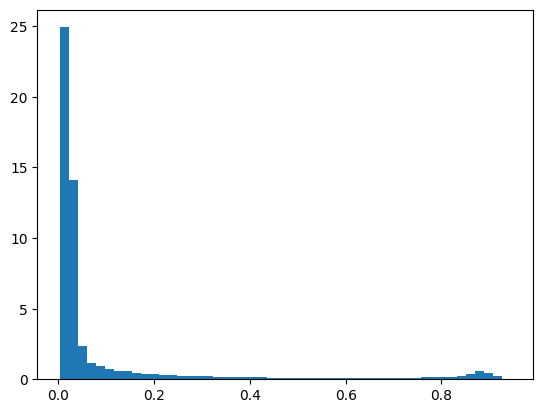

In [635]:
plt.hist(test_had_probs, bins = 50, density=True)
plt.show()  # rejects most hadrons but is not perfect

In [ ]:
fontsize = 12
ticklen = 5
params = {
    'font.size': fontsize,
    'axes.titlesize': fontsize,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'axes.labelsize': fontsize,
    'legend.fontsize': fontsize,
    'xtick.major.size' : ticklen,
    'ytick.major.size' : ticklen,
    'xtick.minor.size' : ticklen/2,
    'ytick.minor.size' : ticklen/2
}
plt.rcParams.update(params)